In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import random
import pandas as pd

In [2]:
dataset = pd.read_csv('email-Eu-core-temporal.txt', delimiter=' ', header=None)
dataset.columns = ['source', 'target', 'timestamp']
edge_list = [(row['source'], row['target'], int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
delta = 30
k = 4

In [4]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [5]:
def random_percentage_subset(input_list, percentage, seed=None):
    if not 0 <= percentage <= 100:
        raise ValueError("Percentage must be between 0 and 100.")

    # Set the seed for reproducibility
    random.seed(seed)

    # Calculate the number of elements to include
    num_elements = int(len(input_list) * (percentage / 100))

    # Randomly select elements
    subset = random.sample(input_list, num_elements)

    return subset

## PaCo

In [6]:
def execute_paco(data, delta, k):     
    start = time()
    C = paco(data, delta, k)
    end = time()
    count = sum(C.values())
    return count, end-start

In [7]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    data = TimeStampedLinkList.from_edgelist(n_edges)
    count, runtime = execute_paco(data, delta, k)
    results.append((count, runtime, round(n_links / 10**3)))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.03it/s]


In [8]:
_, paco_runtimes_sec, paco_n_links = zip(*results)

## Baseline

In [9]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    
    # Create pathpy temporal network
    t = create_temporal_network(n_edges)
    
    # Calculate paths
    count, runtime = get_total_causal_paths(t, delta, k)
    
    
    results.append((count, runtime, round(n_links / 10**3)))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66466/66466 [00:01<00:00, 47262.26it/s]

2023-12-18 00:09:39 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-18 00:09:58 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		2036515
Roots:		53608
Leaves:		1982855
Links:		1987860
Acyclic:	None

2023-12-18 00:09:58 [Severity.INFO]	Generating causal trees for 53608 root nodes ...
2023-12-18 00:10:02 [Severity.INFO]	finished.


 20%|███████████████████████████████████▍                                                                                                                                             | 1/5 [00:25<01:40, 25.10s/it]

Number of causal paths: Total path count: 		66210.0 
[Unique / Sub paths / Total]: 	[13158.0 / 132603.0 / 198813.0]
Nodes:				902 
Edges:				13112
Max. path length:		2
Avg path length:		1.0009213109802144 
Paths of length k = 0		0.0 [ 0.0 / 132481.0 / 132481.0 ]
Paths of length k = 1		66149.0 [ 13103.0 / 122.0 / 66271.0 ]
Paths of length k = 2		61.0 [ 55.0 / 0.0 / 61.0 ]





100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 132933/132933 [00:03<00:00, 34984.76it/s]

2023-12-18 00:10:07 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-18 00:10:53 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		4042337
Roots:		97357
Leaves:		3944754
Links:		3964470
Acyclic:	None

2023-12-18 00:10:53 [Severity.INFO]	Generating causal trees for 97357 root nodes ...
2023-12-18 00:11:01 [Severity.INFO]	finished.


 40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 2/5 [01:24<02:16, 45.42s/it]

Number of causal paths: Total path count: 		131924.0 
[Unique / Sub paths / Total]: 	[17909.0 / 264706.0 / 396630.0]
Nodes:				940 
Edges:				17677
Max. path length:		3
Avg path length:		1.0021527546162943 
Paths of length k = 0		0.0 [ 0.0 / 264132.0 / 264132.0 ]
Paths of length k = 1		131646.0 [ 17654.0 / 562.0 / 132208.0 ]
Paths of length k = 2		272.0 [ 249.0 / 12.0 / 284.0 ]
Paths of length k = 3		6.0 [ 6.0 / 0.0 / 6.0 ]





 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 168922/199400 [00:04<00:01, 25964.36it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199400/199400 [00:05<00:00, 38275.45it/s]


2023-12-18 00:11:08 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:12:27 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		6024011
Roots:		136984
Leaves:		5886610
Links:		5929230
Acyclic:	None

2023-12-18 00:12:27 [Severity.INFO]	Generating causal trees for 136984 root nodes ...
2023-12-18 00:12:41 [Severity.INFO]	finished.


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 3/5 [03:06<02:22, 71.04s/it]

Number of causal paths: Total path count: 		197231.0 
[Unique / Sub paths / Total]: 	[21198.0 / 396168.0 / 593399.0]
Nodes:				960 
Edges:				20748
Max. path length:		4
Avg path length:		1.0028646612347958 
Paths of length k = 0		0.0 [ 0.0 / 395027.0 / 395027.0 ]
Paths of length k = 1		196676.0 [ 20704.0 / 1120.0 / 197796.0 ]
Paths of length k = 2		546.0 [ 487.0 / 19.0 / 565.0 ]
Paths of length k = 3		8.0 [ 6.0 / 2.0 / 10.0 ]
Paths of length k = 4		1.0 [ 1.0 / 0.0 / 1.0 ]





 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 171538/265867 [00:04<00:03, 29330.97it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 265867/265867 [00:08<00:00, 29769.40it/s]

2023-12-18 00:12:53 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-18 00:14:47 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		7984104
Roots:		173796
Leaves:		7809608
Links:		7881240
Acyclic:	None

2023-12-18 00:14:47 [Severity.INFO]	Generating causal trees for 173796 root nodes ...
2023-12-18 00:15:09 [Severity.INFO]	finished.


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 4/5 [05:38<01:43, 103.22s/it]

Number of causal paths: Total path count: 		262015.0 
[Unique / Sub paths / Total]: 	[23832.0 / 526962.0 / 788977.0]
Nodes:				972 
Edges:				23060
Max. path length:		6
Avg path length:		1.0036906283991374 
Paths of length k = 0		0.0 [ 0.0 / 524997.0 / 524997.0 ]
Paths of length k = 1		261071.0 [ 23002.0 / 1911.0 / 262982.0 ]
Paths of length k = 2		926.0 [ 817.0 / 41.0 / 967.0 ]
Paths of length k = 3		15.0 [ 10.0 / 8.0 / 23.0 ]
Paths of length k = 4		2.0 [ 2.0 / 3.0 / 5.0 ]
Paths of length k = 5		0.0 [ 0.0 / 2.0 / 2.0 ]
Paths of length k = 6		1.0 [ 1.0 / 0.0 / 1.0 ]





 49%|████████████████████████████████████████████████████████████████████████████████                                                                                    | 162229/332334 [00:04<00:06, 27525.39it/s]


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 254010/332334 [00:08<00:03, 23557.62it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 332334/332334 [00:12<00:00, 25853.00it/s]


2023-12-18 00:15:30 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:18:38 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		9922811
Roots:		208485
Leaves:		9713303
Links:		9820080
Acyclic:	None

2023-12-18 00:18:38 [Severity.INFO]	Generating causal trees for 208485 root nodes ...
2023-12-18 00:18:48 [Severity.INFO]	Analyzing tree 41697/208485 ...
2023-12-18 00:18:56 [Severity.INFO]	Analyzing tree 83394/208485 ...
2023-12-18 00:19:03 [Severity.INFO]	Analyzing tree 125091/208485 ...
2023-12-18 00:19:11 [Severity.INFO]	Analyzing tree 166788/208485 ...
2023-12-18 00:19:22 [Severity.INFO]	Analyzing tree 208485/208485 ...
2023-12-18 00:19:22 [Severity.INFO]	finished.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [10:11<00:00, 122.37s/it]

Number of causal paths: Total path count: 		326333.0 
[Unique / Sub paths / Total]: 	[26109.0 / 657204.0 / 983537.0]
Nodes:				986 
Edges:				24929
Max. path length:		7
Avg path length:		1.0045658882184763 
Paths of length k = 0		0.0 [ 0.0 / 654156.0 / 654156.0 ]
Paths of length k = 1		324892.0 [ 24868.0 / 2931.0 / 327823.0 ]
Paths of length k = 2		1401.0 [ 1211.0 / 89.0 / 1490.0 ]
Paths of length k = 3		37.0 [ 27.0 / 12.0 / 49.0 ]
Paths of length k = 4		0.0 [ 0.0 / 9.0 / 9.0 ]
Paths of length k = 5		1.0 [ 1.0 / 5.0 / 6.0 ]
Paths of length k = 6		1.0 [ 1.0 / 2.0 / 3.0 ]
Paths of length k = 7		1.0 [ 1.0 / 0.0 / 1.0 ]




In [10]:
_, baseline_runtimes_sec, baseline_n_links = zip(*results)

## Plots

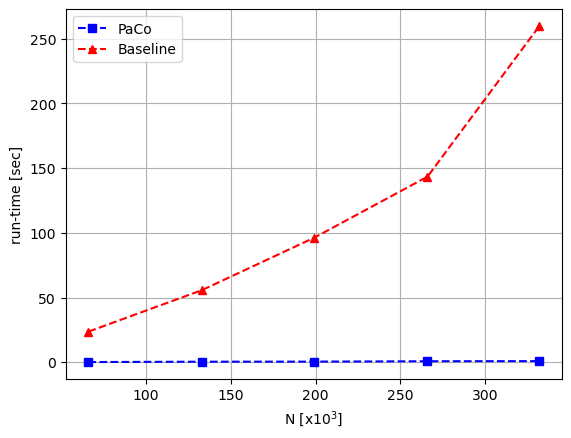

In [11]:
plt.plot(paco_n_links, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_n_links, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("N [x$10^3$]")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/email_panel.png')
plt.show()